![image.png](images/sponsor.png)

# NATIONAL SECURITY AND SCIENCE OF FACIAL RECOGNITION

In [1]:
import sys # system functions (ie. exiting the program)
import os # operating system functions (ie. path building on Windows vs. MacOs)
import time # for time operations
import uuid # for generating unique file names
import math # math functions

from IPython.display import display as ipydisplay, Image, clear_output, HTML # for interacting with the notebook better

import numpy as np # matrix operations (ie. difference between two matricies)
import cv2 # (OpenCV) computer vision functions (ie. tracking)
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
print('OpenCV Version: {}.{}.{}'.format(major_ver, minor_ver, subminor_ver))

import matplotlib.pyplot as plt # (optional) for plotting and showing images inline
%matplotlib inline

import keras # high level api to tensorflow (or theano, CNTK, etc.) and useful image preprocessing
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
print('Keras image data format: {}'.format(K.image_data_format()))
from IPython.display import YouTubeVideo
from IPython.display import IFrame


OpenCV Version: 4.1.0


Using TensorFlow backend.


Keras image data format: channels_last


In [2]:
def show_image(name):
    """
    Showing image files.
    """
    fname = os.path.join(IMAGES_FOLDER, name)
    ipydisplay(Image(fname))

In [3]:
IMAGES_FOLDER = os.path.join('images') # images for visuals

MODEL_PATH = os.path.join('model')
MODEL_FILE = os.path.join(MODEL_PATH, 'hand_model_gray.hdf5') # path to model weights and architechture file
MODEL_HISTORY = os.path.join(MODEL_PATH, 'model_history.txt') # path to model training history

## Agenda

- Bio
- Five Data Science Truths
- Problem overview
- Dependencies
- Hands on demo
- Conclusion

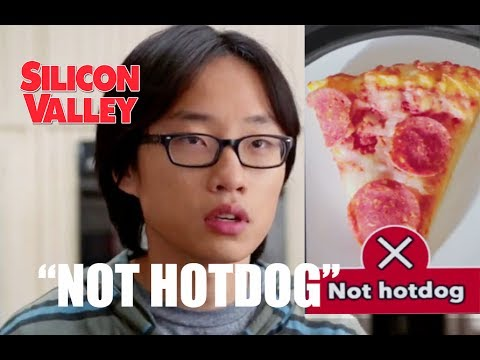

In [4]:
YouTubeVideo('mrk95jFVKqY')

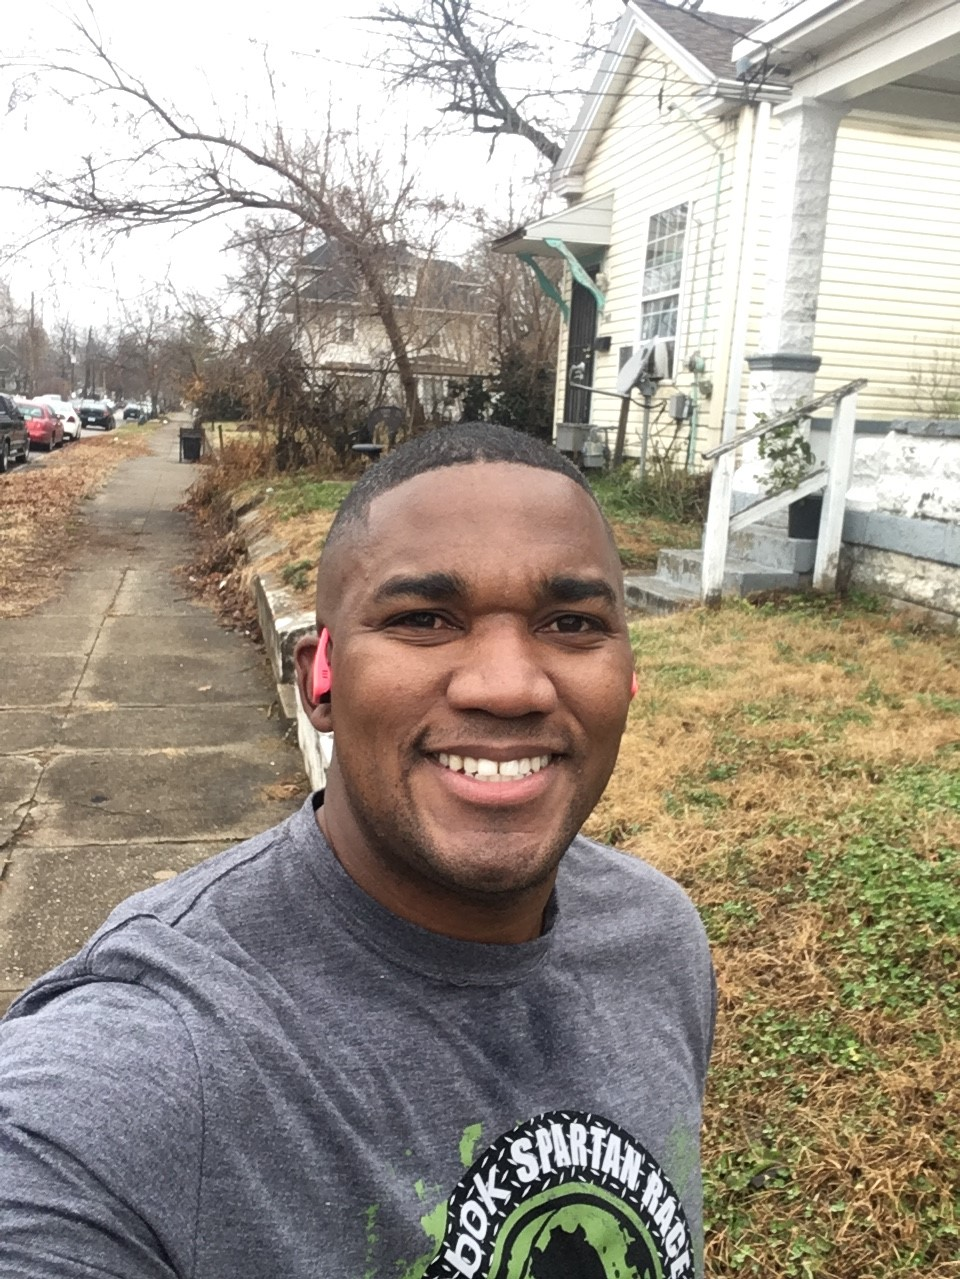

### BIO
I use data science to solve healthcare problems for the Army's Medical Department. I have been a Data Sciencetist for the last few years. Before that I worked as a reconansince expert for the Army. I deployed to Afghanistan, Iraq, Republic of Georgia, and Germany where i had a chance to see first hand how the millitary uses facial recognition to help track suspected terrorist.



**Current role**
- Data Scientest

**Program Languages**
- python 
- SQL
- java
- scala
- java script
- C++
- C

**Tools**
- Apache: Spark
- Apache: Kafka
- Apache: Airflow
- AWS
- Azure

**Education**
- MS Computer Science: Data Science
- MS Cyber Security and Information Assurance
- BS Accounting

**Interest**
- Running
- Foodie
- Building things
- Startups
- Father of three

**Groups**
- NumFocus: Diversity and Inclusion Working Group

**Contact Information**
- Linkedin: [Luther Hill]('www.linkedin.com/in/sweetTea')
Github: [Luther Hill]('https://github.com/lutherkhill')

### Five Data Science Truths

1. Humans Are More Important Than Data
2. More data == more truth
3. Your data is only as good as your ability to communicate it.

### Dependencies

- Visual Studio Code
- Jupyter Notebook [link text](https://jupyter.org/)
- OpenCV [link text](https://docs.opencv.org/master/index.html)
- AWS rekognition [link text](https://aws.amazon.com/rekognition/)

Python packages used

- pandas
- numpy
- boto3
- sklearn
- matplotlib
- seaborn
- pillow
- time
- math
- sys
- os
- keras
- tensorflow
- opencv

**"Any sufficently advanced technology is similar to magic"
Arthur C, Clark**

### Problem overview
There is a growing fear that our government is using the adavnces in Artificial Inteligence(AI)/Machine Learning(ML) to build a suvailance state. There have been recent reports of governemnt agencies using DMV records to train compters to recognize citizens.
For this presentation we will explore the science, tools, and companies that make this possible.
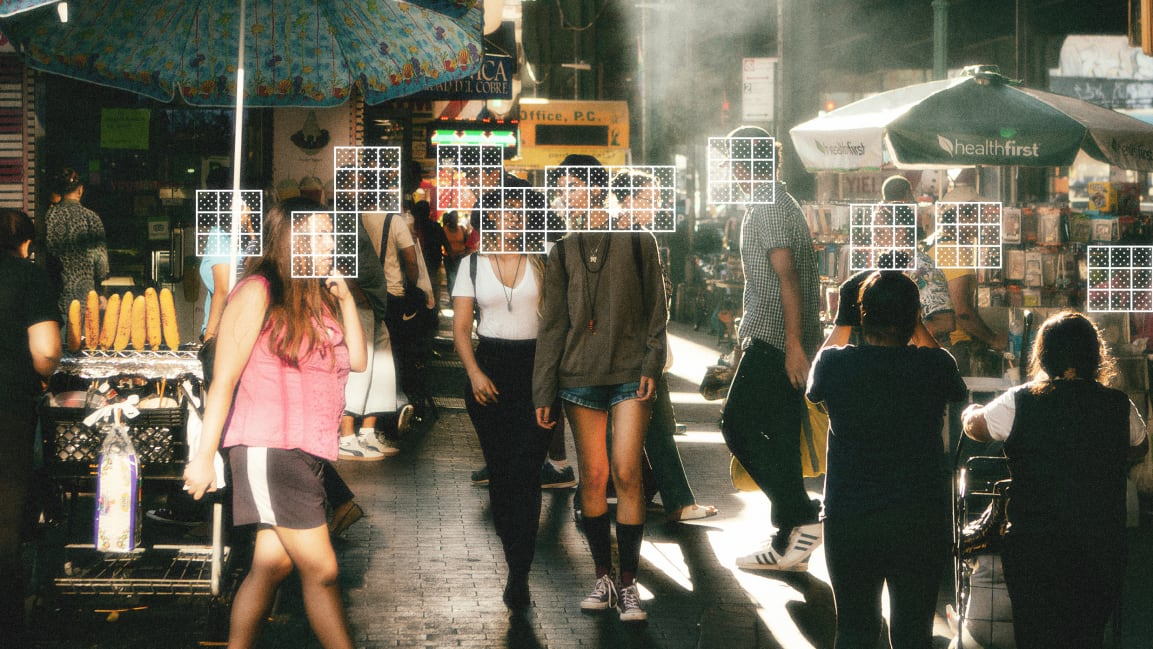

# Facial recognition in the news

*Facial-recognition use by federal agencies draws lawmakers’ anger*
[Link](https://www.washingtonpost.com/technology/2019/07/09/facial-recognition-use-by-federal-agencies-draws-lawmakers-anger/?utm_term=.14a6a36ab8a6)

*Orlando Cancels Amazon Rekognition Contract*
[Link](https://www.orlandoweekly.com/Blogs/archives/2019/07/18/orlando-cancels-amazon-rekognition-capping-15-months-of-glitches-and-controversyLink)

## Science of facial recognition

### Some Object Detection History (2001-2017)

**The first efficient Face Detector (Viola-Jones Algorithm, 2001)**

- An efficient algorithm for face detection was invented by Paul Viola & Michael Jones 
- Their demo showed faces being detected in real time on a webcam feed.
- Was the most stunning demonstration of computer vision and its potential at the time. 
- Soon, it was implemented in OpenCV & face detection became synonymous with Viola and Jones algorithm.

![alt text](https://www.researchgate.net/profile/Salah_Eddine_Bekhouche/publication/275043966/figure/fig2/AS:294542428393474@1447235795083/Fig-2-The-proposed-approach-a-Viola-Jones-algorithm-b-Active-Shape-Models-with.png "Logo Title Text 1")

![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S2468067216300116-gr1.jpg "Logo Title Text 1")

**Much more efficient detection technique (Histograms of Oriented Gradients, 2005)**
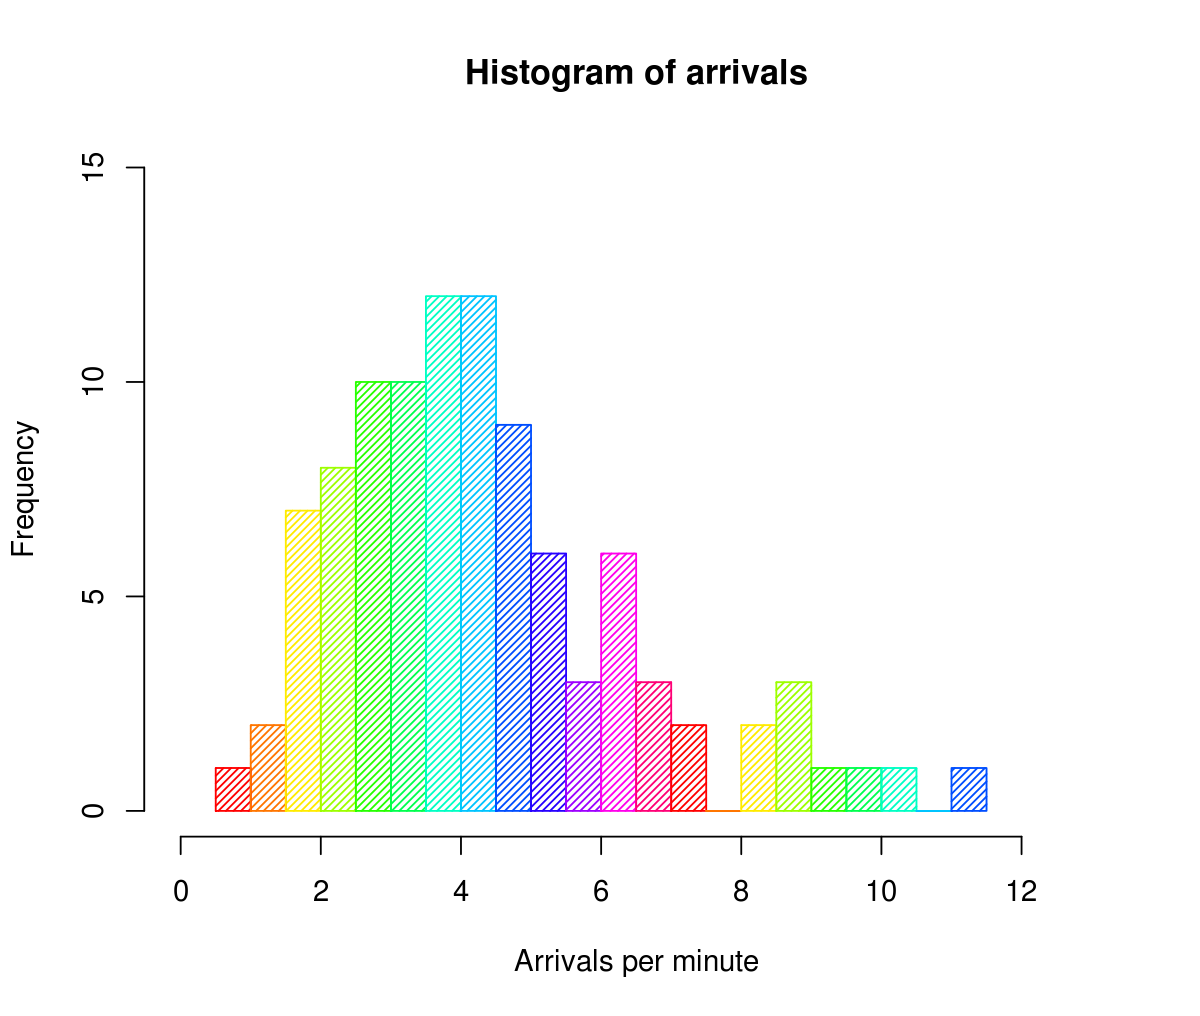
- Navneet Dalal and Bill Triggs invented "HOG" for pedestrian detection
- Their feature descriptor, Histograms of Oriented Gradients (HOG), significantly outperformed existing algorithms in this task
- Handcoded features, just like before

- For every single pixel, we want to look at the pixels that directly surrounding it:

![Alt Text](https://cdn-images-1.medium.com/max/1440/1*RZS05e_5XXQdofdRx1GvPA.gif)

- Goal is, how dark is current pixel compared to surrounding pixels?
- We will then draw an arrow showing in which direction the image is getting darker:

![Alt Text](https://cdn-images-1.medium.com/max/1440/1*WF54tQnH1Hgpoqk-Vtf9Lg.gif)

- We repeat that process for every single pixel in the image
- Every pixel is replaced by an arrow. These arrows are called gradients
- Gradients show the flow from light to dark across the entire image:

![Alt Text](https://cdn-images-1.medium.com/max/1440/1*oTdaElx_M-_z9c_iAwwqcw.gif)

- We'll break up the image into small squares of 16x16 pixels each
- In each square, we’ll count up how many gradients point in each major direction
- Then we’ll replace that square in the image with the arrow directions that were the strongest.
- End result? Original image converted into simple representation that captures basic structure of a face in a simple way:
- Detecting faces means find the part of our image that looks the most similar to a known HOG pattern that was extracted from a bunch of other training faces:

![Alt Text](https://cdn-images-1.medium.com/max/1440/1*6xgev0r-qn4oR88FrW6fiA.png)



### The Deep Learning Era begins (2012)

- Convolutional Neural Networks became the gold standard for image classification after Kriszhevsky's CNN's performance during ImageNet
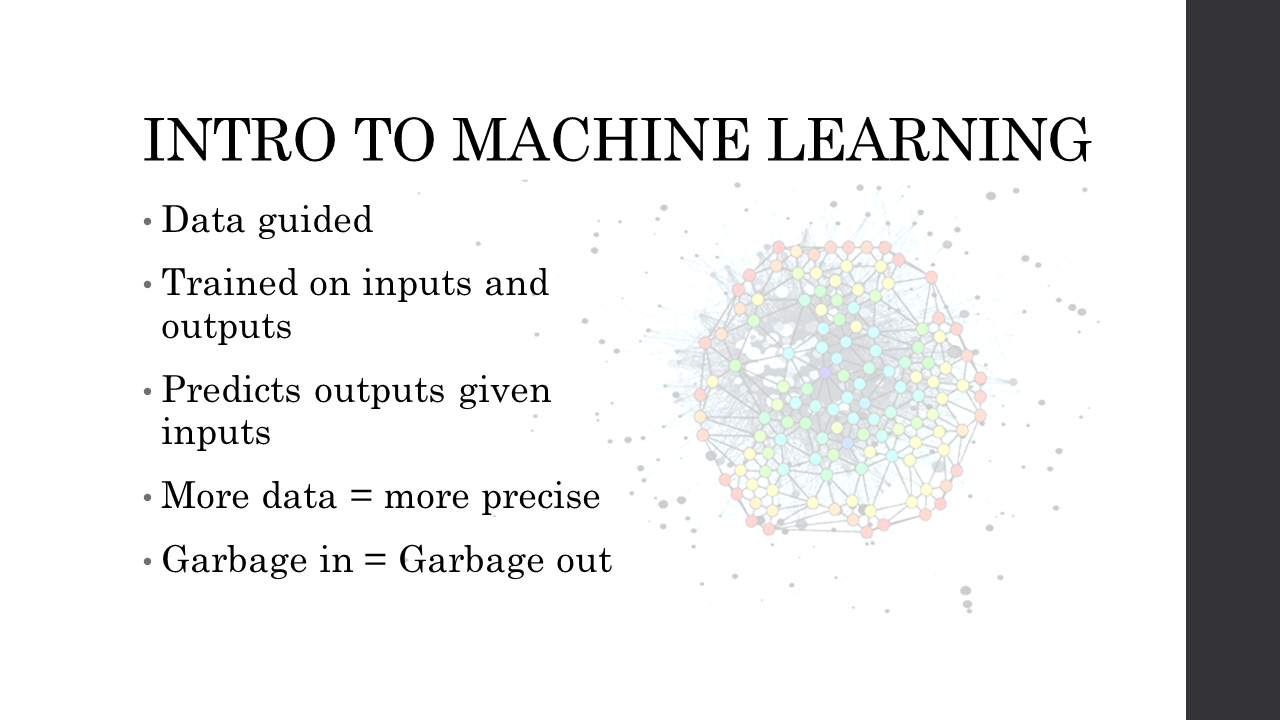
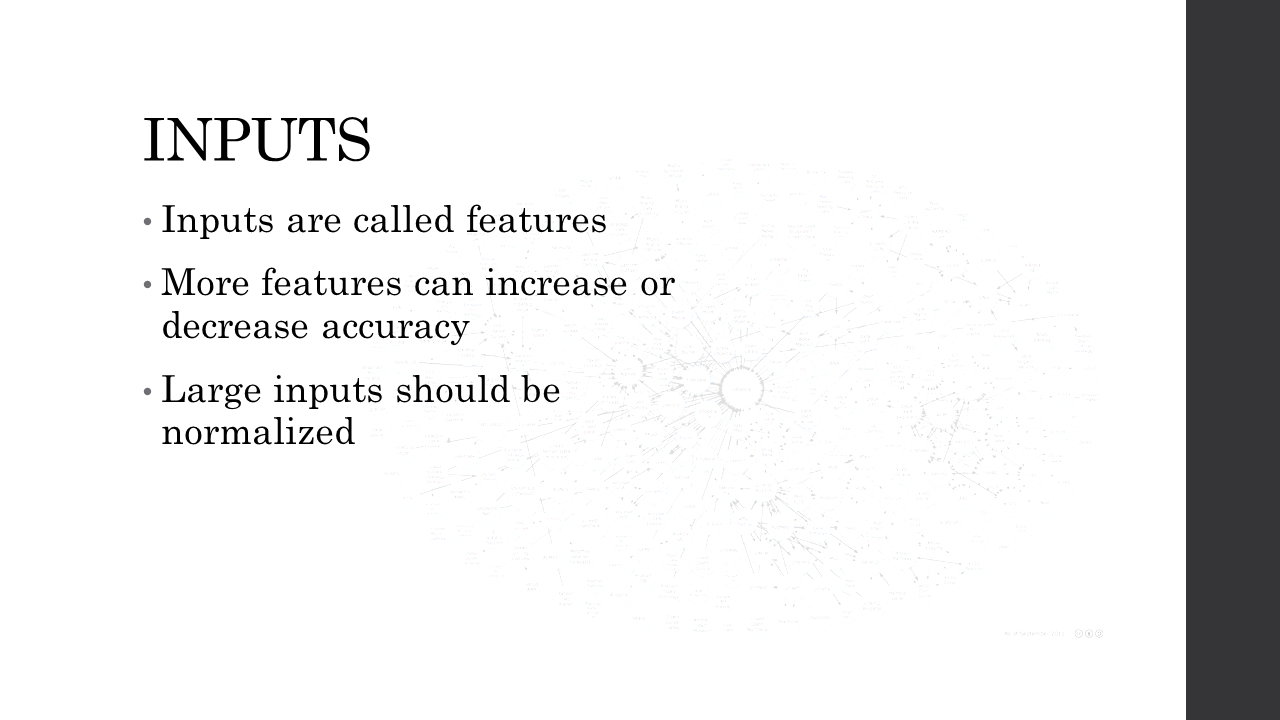
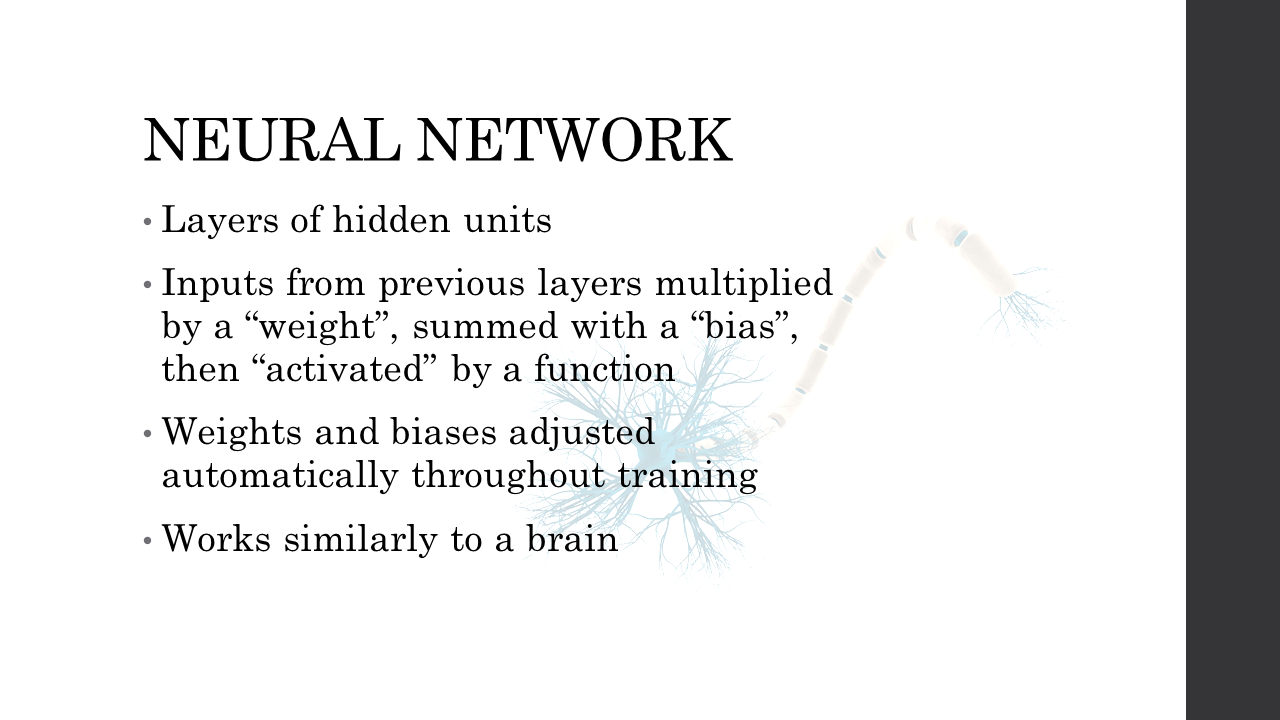

Here we build our neural network and compile it with a loss function and optimizers of our choice.
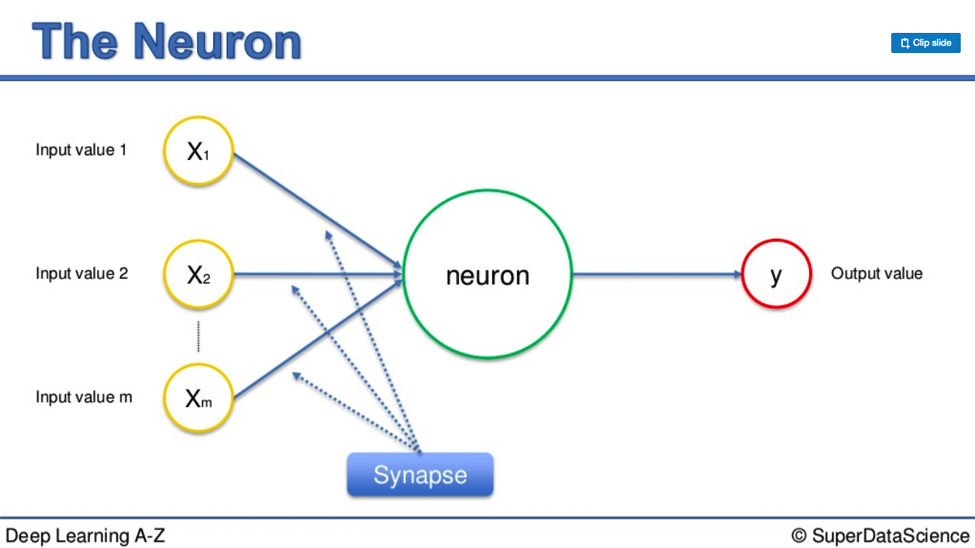
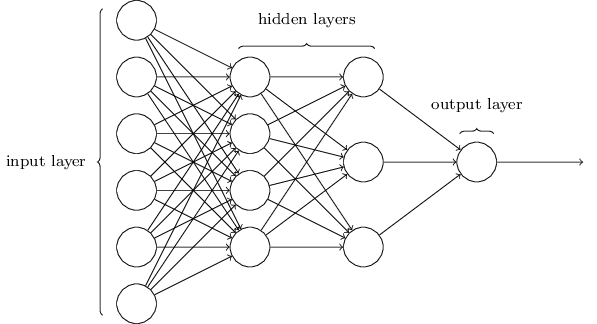


**Deep Convolutional Neural Networks**

CNNs are a type of neural network often used for image problems. CNNs and D-CNNs contain layers called convolutional layers that behave differently from the usual fully connected layers that you see in neural networks.

The images below come from https://brohrer.github.io/how_convolutional_neural_networks_work.html which offers a more in depth explanation.

"Regular" neural networks are less effective when working with images as every pixel is considered separately when calculating probabilities. This means that a normal fully-connected neural network is not good at classifying images, for example, if the object moves in the scene

![image.png](images/cnn1.png)

Convolutional layers learn to look for *features* that are found in an image of certain classes. This is useful because it means that early on in a computation the model is not looking for specific *things* but rather simpler features like edges and corners.

![images.png](images/cnn2.png)

To look for these features, the convolutional layers learn *filters* that are applied accross the image using a sliding window. This window finds how similair the filter being applied and the region of the image is.

![image](images/cnn3.png)

Early in the computation, the filters are looking for edges and corners, then evenutally uses these edges and corners to look for higher and higher level features. By the end of the computation, filters are being learned to look for very high level features.

![image.png](images/cnn4.png)

After features are extracted by the convolutional layers, this high level data is fed into a regular neural network which learns which features correspond to which outputs.

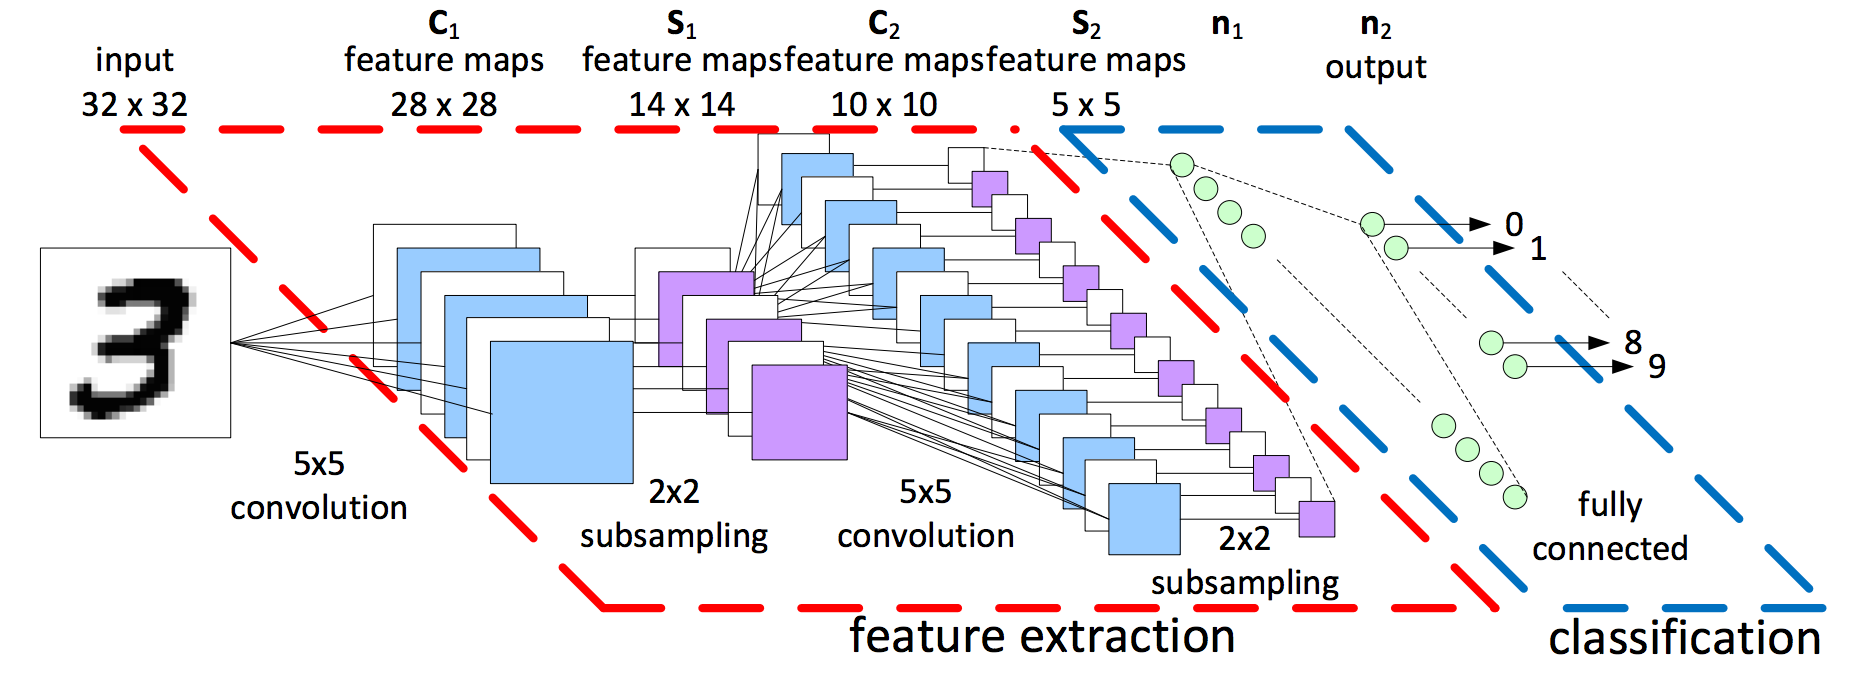

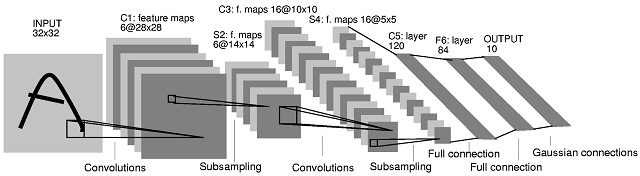

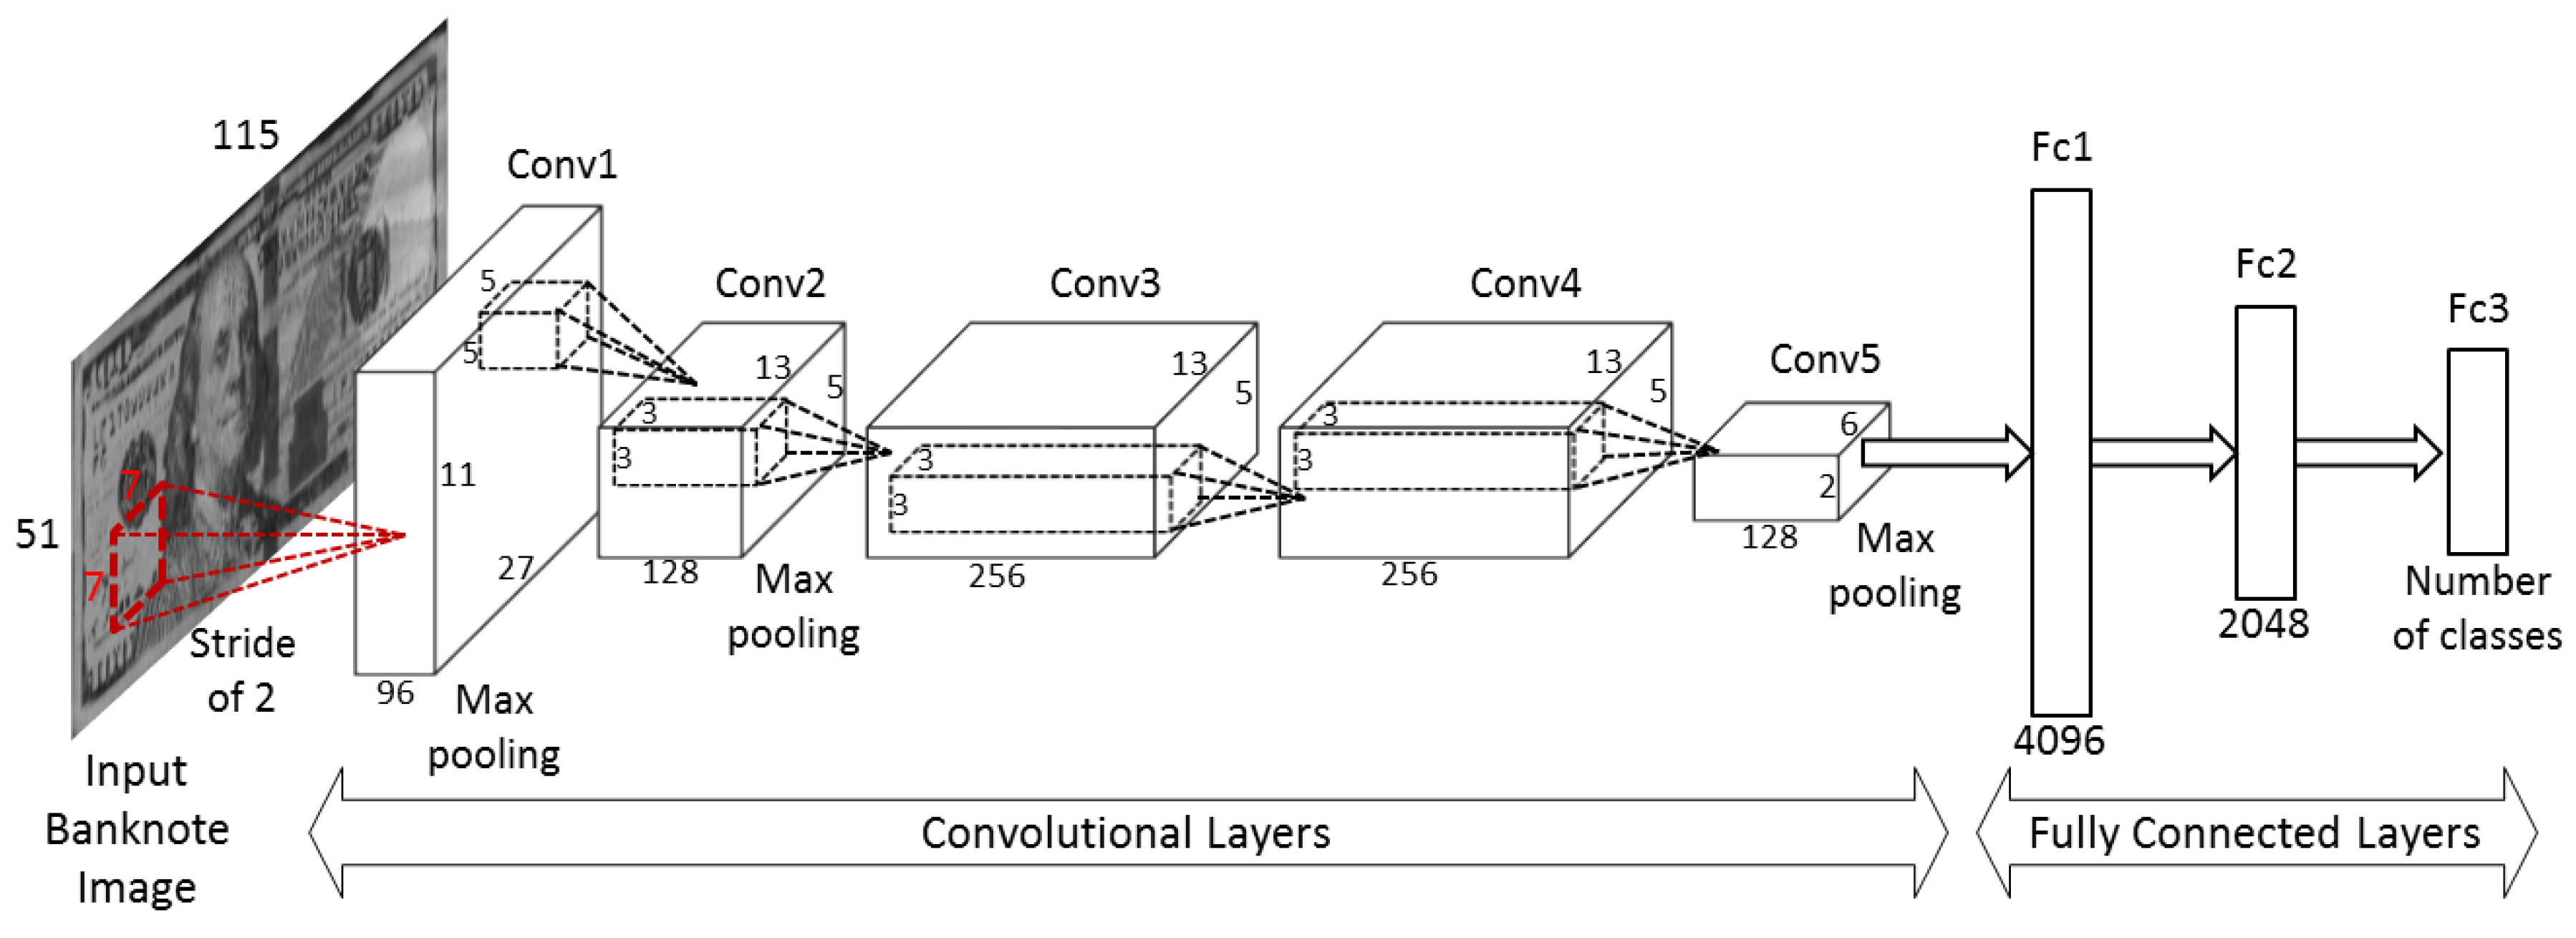

In [5]:
show_image('cnn5.png')
show_image('cnn6.png')
show_image('cnn7.png')

####  (Deep) Neural Networks (NN/DNN)

To get a taste of neural networks, we're going to teach one how to add two numbers between 0 and 5000.

In [6]:
test_model = Sequential()

test_model.add(Dense(2, input_shape=(2,), activation='relu'))
test_model.add(Dense(32, activation='relu'))
test_model.add(Dense(32, activation='relu'))
test_model.add(Dense(1, activation='relu'))

test_model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

W0821 10:07:07.875561 20368 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 10:07:07.888587 20368 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 10:07:07.891566 20368 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 10:07:07.931567 20368 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



A nice look at the model's architecture

In [7]:
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________


Here we generate some data for the model to train on.

In [8]:
import random
# list of 5000 tuples, each with two numbers between 0 and 5000
data_x = [(random.randint(0, 5000), random.randint(0, 5000)) for x in range(5000)]
# list of the expected result when the two numbers are added
data_y = [x[0] + x[1] for x in data_x]

And now we train the model.

In [9]:
# test_model.fit(data_x, data_y, batch_size=16, epochs=2000, shuffle=True)
# test_model.save(os.path.join(MODEL_PATH, 'adder_model.hdf5'))

And now we have a (really bad) neural network calculator. What's really cool about this is that you can also add numbers the network has never seen before.

In [10]:
test_model = load_model(os.path.join(MODEL_PATH, 'adder_model.hdf5'), compile=False)
a = input("First number: ")
b = input("Second number: ")
d = np.expand_dims(np.array([a, b]), axis=0)
test_model.predict(d)

W0821 10:07:08.361564 20368 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0821 10:07:08.362564 20368 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



First number: 5
Second number: 8


array([[13.002342]], dtype=float32)

### OpenCV
#### Constants

#### Displaying images
###### Fix color channel ordering for plotting
Matplotlib and OpenCV order colour channels in image matricies slightly differently, RGB and BGR respectively. We need to reorder the colour channels if we want to plot OpenCV images with Matplotlib.

In [11]:
def bgrtorgb(image):
    return cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)

#### Jupyter Notebook image display

In [12]:
def plot_image(image, figsize=(8,8), recolour=False):
    """
    Plotting image matricies.
    """
    if recolour: image = bgrtorgb(image)
    plt.figure(figsize=figsize)
    if image.shape[-1] == 3:
        plt.imshow(image)
    elif image.shape[-1] == 1 or len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        raise Exception("Image has invalid shape.")

#### Take webcam shot

In [13]:
video = cv2.VideoCapture(0)

while True:
    # Read a new frame
    success, frame = video.read()
    if not success:
        # Frame not successfully read from video capture
        break
        
    # Display result
    cv2.imshow("frame", frame)
    
    k = cv2.waitKey(1) & 0xff
    if k == 27:# escape pressed 
        break
    elif k == 115: # s pressed
        fname = input("File name")
        cv2.imwrite(os.path.join(IMAGES_FOLDER, '{}.jpg'.format(fname)), frame)
        
cv2.destroyAllWindows()
video.release()

#### Reading video from webcam

Create an instance of a video capture object. Read and display frame by frame in a while loop until escape is pressed.

In [14]:
video = cv2.VideoCapture(0)

while True:
    # Read a new frame
    success, frame = video.read()
    if not success:
        # Frame not successfully read from video capture
        break
        
    # Display result
    cv2.imshow("frame", frame)
    
    k = cv2.waitKey(1) & 0xff
    if k == 27: break # ESC pressed
        
cv2.destroyAllWindows()
video.release()

#### Clean windows and release video capture

This is useful for when a video capture loop errors out, but your webcam is still stuck capturing and windows are left open.

In [15]:
cv2.destroyAllWindows()
video.release()

#### Getting key presses

It's sometimes useful to get key presses to alter the algorithms being run, stat certain processes, run functions, etc.

The video window must be selected to register a key press. *k*, in this case, will equal 255 if nothing is pressed.

In [16]:
while True:
    # Placeholder frame to show window
    window = np.zeros((300,300))
    
    # Display result
    cv2.imshow("frame", window)
    
    k = cv2.waitKey(1) & 0xff
    if k != 255: # A key is pressed
        print(k)
        
    if k == 27:# escape pressed 
        break
        
cv2.destroyAllWindows()
video.release()

102
101
102
101
102
27


#### *Computer Vision Concepts*
#### What computers see

Computers 'look' at images as multidimensional arrays or matricies but they can also be treated like functions (ex. taking the derivative over an image's x-axis).

Below an image is loaded from the file system and loaded into memory. This matrix is 387 x 600 x 3 which represents the number of rows x number of columns x number of colour channels (RGB/BGR).

We can then plot that data to view the image.

Note: When images are loaded in OpenCV, they return BGR (blue, green, red) channels, where as matplotlib expects RGB (red, green, blue). Therefore, we need  to convert the loaded image matrix from BGR to RGB.

Image Shape:  (1279, 960, 3) 


Image Matrix: 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [161 156 150]
  [163 158 152]
  [155 150 144]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [153 148 142]
  [154 149 143]
  [150 145 139]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [155 150 144]
  [163 158 152]
  [166 161 155]]

 ...

 [[123 129 141]
  [121 127 139]
  [117 123 135]
  ...
  [125 109  75]
  [105  91  56]
  [ 95  82  47]]

 [[150 156 168]
  [142 148 160]
  [135 141 153]
  ...
  [ 71  56  23]
  [ 64  49  16]
  [ 71  58  24]]

 [[146 152 164]
  [139 145 157]
  [141 147 159]
  ...
  [ 88  73  40]
  [ 78  63  32]
  [ 79  66  34]]] 


Image Plotted:


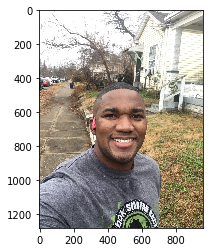

In [17]:
luther_fname = os.path.join(IMAGES_FOLDER, 'luther.jpeg')
luther_img = cv2.imread(luther_fname)
#comment out the line below to see the colour difference
luther_img = cv2.cvtColor(luther_img, cv2.COLOR_BGR2RGB)
plt.imshow(luther_img)

print('Image Shape: ', luther_img.shape, '\n\n')
print('Image Matrix: \n', luther_img, '\n\n')
print('Image Plotted:')

#### Image Filters and Functions

Many times, images contain complex information that isn't needed for a computation or reduces the speed of computation without much value added.

#### Blurring

Blurring is useful when there is noise in an image you want to remove.

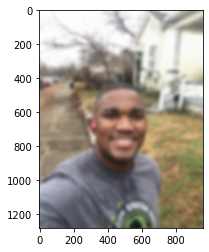

In [18]:
blur_img = luther_img.copy()
blur_img = cv2.GaussianBlur(blur_img, (41, 41), 10)
plt.imshow(blur_img)

#### Dilating

Dilation, as it sounds, dilates pixel neighbourhoods by finding maximums over the image by the kernel size given. This is useful for expanding selections (we'll look at this later).

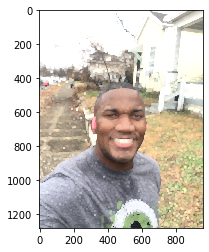

In [19]:
dilate_img = luther_img.copy()
dilate_img = cv2.dilate(dilate_img, np.ones((10,10), dtype=np.uint8), iterations=1)
plt.imshow(dilate_img)

#### Erosion

Erosion is the opposite of dilation, useful for remove noise.

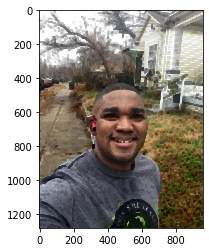

In [20]:
erosion_img = luther_img.copy()
erosion_img = cv2.erode(erosion_img, np.ones((10,10), dtype=np.uint8), iterations=1)
plt.imshow(erosion_img)

#### Canny edge detector

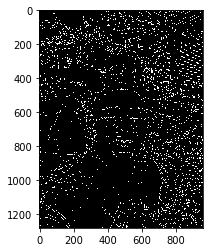

In [21]:
canny_img = luther_img.copy()
canny_img = cv2.erode(canny_img, np.ones((8,8), dtype=np.uint8), iterations=1)
edges = cv2.Canny(canny_img,100,100)
plt.imshow(edges.astype(np.uint8), cmap='gray')

#### Thresholding

Thresholding can be thought of as a function applied to each pixel of an image. This function takes a min and max thresholding values and if the pixel value falls in this range, it will 'return' the pixel, if not it will 'return' a black pixel.

Generally, thresholding is applied to a greyscale image, but may also be applied to colour images, following a similair principle.

(1279, 960)


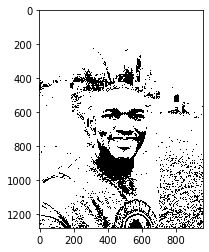

In [22]:
thresh_img = luther_img.copy()
thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(thresh_img, 80, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
print(thresh.shape)

#### Using a background image to find differences (can be used for images and video)

This technique requires a background image to find the difference between the background and the current frame to find what as changed. This difference creates a 'mask' that represents where in the image the foreground is. A draw back of this algorithm is that any movement of the camera, change of lighting, change in focus, etc. will make the current frame totally different from the background image.

The algorithm:
* load in the background image and the current frame
* find the absolute difference between the images
* create a mask that contains a 'map' of pixels that should be 'on or off'
* apply the mask to the current frame to extract the foreground by iterating over each pixel and copying all pixels from the current frame that should be part of the foreground

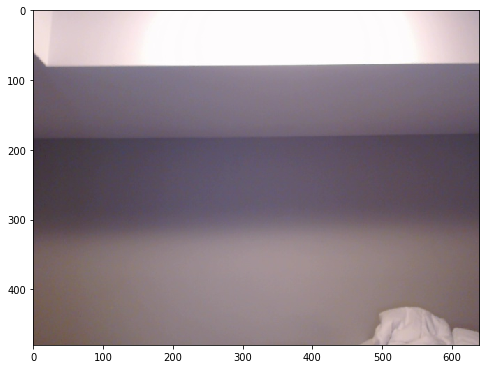

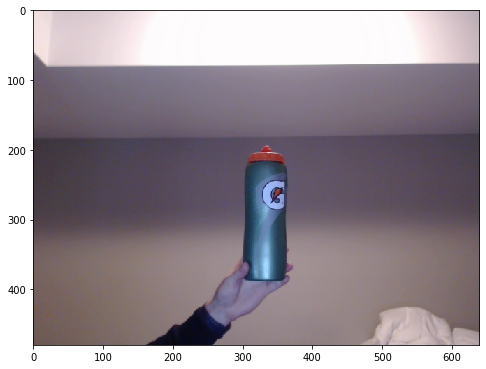

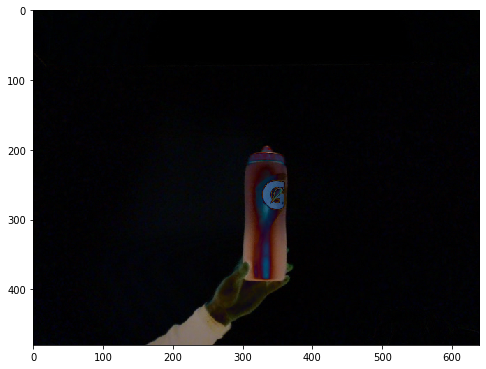

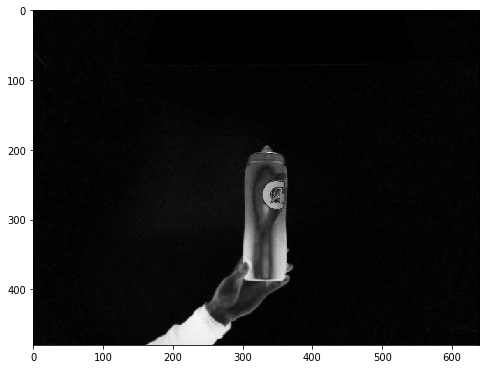

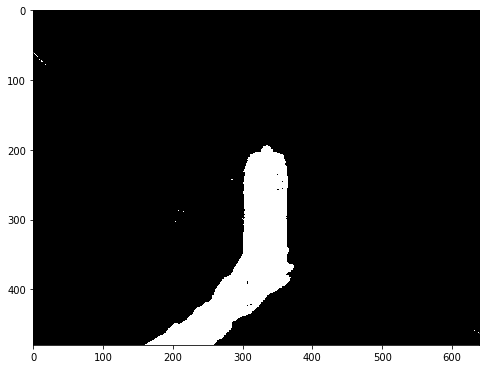

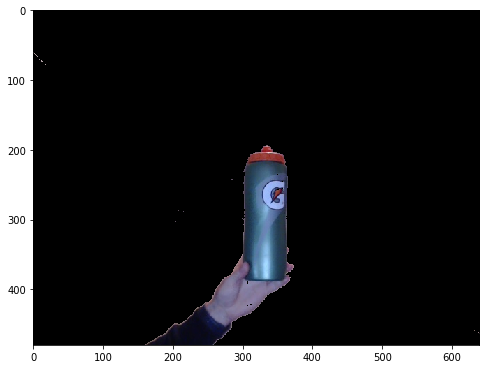

In [23]:
bg_img = cv2.imread(os.path.join(IMAGES_FOLDER, 'bg.jpg'))
current_frame_img = cv2.imread(os.path.join(IMAGES_FOLDER, 'current_frame.jpg'))

diff = cv2.absdiff(bg_img, current_frame_img)
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
th, mask_thresh = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)

mask_indexes = mask_thresh > 0

foreground = np.zeros_like(current_frame_img, dtype=np.uint8)
for i, row in enumerate(mask_indexes):
    foreground[i, row] = current_frame_img[i, row]

plot_image(bg_img, recolour=True)
plot_image(current_frame_img, recolour=True)
plot_image(diff, recolour=True)
plot_image(mask)
plot_image(mask_thresh)
plot_image(foreground, recolour=True)

#### Using motion based background subtraction algorithms (mainly video)

These algorithms are most used for video. The algorithm looks at a series of frames and computes which pixels are most static and identifies the foreground by the pixels that are moving.

In [24]:
ERODE = True

fgbg = cv2.createBackgroundSubtractorMOG2()
# fgbg = cv2.createBackgroundSubtractorKNN()

video = cv2.VideoCapture(os.path.join(IMAGES_FOLDER, 'bg_subtract_movement.mp4'))

while True:
    time.sleep(0.025)
    
    timer = cv2.getTickCount()
    
    # Read a new frame
    success, frame = video.read()
    if not success:
        # Frame not successfully read from video capture
        break
        
    fgmask = fgbg.apply(frame)
    
    # Apply erosion to clean up noise
    if ERODE:
        fgmask = cv2.erode(fgmask, np.ones((3,3), dtype=np.uint8), iterations=1)
    
    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    # Display FPS on frame
    cv2.putText(fgmask, "FPS : " + str(int(fps)), (100, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
 
    # Display result
    cv2.imshow("fgmask", fgmask)
    
    k = cv2.waitKey(1) & 0xff
    if k == 27: break # ESC pressed
        
cv2.destroyAllWindows()
video.release()

#### Contours

Finding contours is done by finding points or corners in an image and connecting those that have the same color or intensity.

#### Finding contours and sorting contours

Here we sort the contours by area and get the 4 largest contours, but we can also find all contours that are greater than a certain size. We can also fill contours by passing -1 to the last parameter of cv2.drawContours().

You can also use contours for masking similair to how it was done above for background subtraction.


#### Tracking

**Contours**

Finding contours is done by finding points or corners in an image and connecting those that have the same color or intensity.

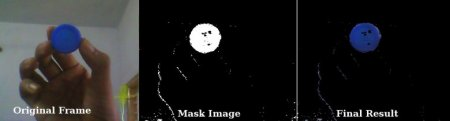

In [27]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()
    
    

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

#### (Deep) Convolutional Neural Networks (CNN/DCNN)

**Objective Demo: Gesture Recognition**

Use computer vision to track the user's hand and recognize gestures.

**Extracting the subject**

First we'll extract the user from the background to make tracking more effective and ensure a more accurate gesture prediction.

Here we take the first frame as the background frame (or reset the it by pressing 'r'). Then we use the frame difference method as previously described.

In [28]:
# Helper function for applying a mask to an array
def mask_array(array, imask):
    if array.shape[:2] != imask.shape:
        raise Exception("Shapes of input and imask are incompatible")
    output = np.zeros_like(array, dtype=np.uint8)
    for i, row in enumerate(imask):
        output[i, row] = array[i, row]
    return output


# Begin capturing video
video = cv2.VideoCapture(0)
if not video.isOpened():
    print("Could not open video")
    sys.exit()


# Read first frame
ok, frame = video.read()
if not ok:
    print("Cannot read video")
    sys.exit()
# Use the first frame as an initial background frame
bg = frame.copy()


# Kernel for erosion and dilation of masks
kernel = np.ones((3,3),np.uint8)


# Capture, process, display loop    
while True:
    # Read a new frame
    ok, frame = video.read()
    if not ok:
        break
        
        
    # Start timer
    timer = cv2.getTickCount()

    
    # Processing
    # First find the absolute difference between the two images
    diff = cv2.absdiff(bg, frame)
    mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    # Threshold the mask
    th, thresh = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)
    # Opening, closing and dilation
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img_dilation = cv2.dilate(closing, kernel, iterations=2)
    # Get mask indexes
    imask = img_dilation > 0
    # Get foreground from mask
    foreground = mask_array(frame, imask)
    
        
    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    # Display FPS on frame
    cv2.putText(frame, "FPS : " + str(int(fps)), (100, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (50, 170, 50), 2)
    
    
    # Display result
    cv2.imshow("frame", frame)
    # Display diff
    cv2.imshow("diff", diff)
    # Display thresh
    cv2.imshow("thresh", thresh)
    # Display mask
    cv2.imshow("img_dilation", img_dilation)
    # Display foreground
    cv2.imshow("foreground", foreground)
    
    
    k = cv2.waitKey(1) & 0xff
    if k == 27: break # ESC pressed
    elif k == 114 or k == 112: 
        # r pressed
        bg = frame.copy()
    elif k != 255: print(k)
        
cv2.destroyAllWindows()
video.release()

In [29]:
cv2.destroyAllWindows()
video.release()

#### Meanshift tracking

The intuition behind the meanshift is simple. Consider you have a set of points. (It can be a pixel distribution like histogram backprojection). You are given a small window ( may be a circle) and you have to move that window to the area of maximum pixel density (or maximum number of points).

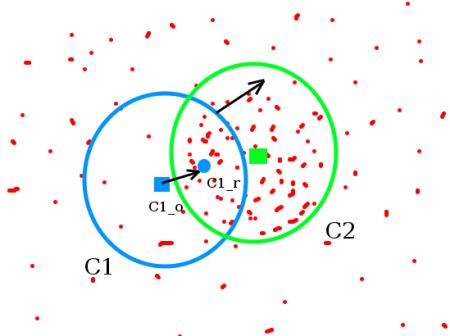

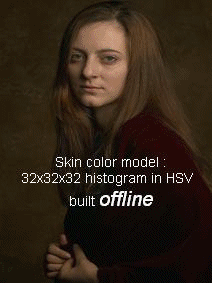

In [30]:
cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('images/slow_traffic_small.mp4')
#cap = cv2.VideoCapture('images/moving_subject.mp4')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

#### Camshift tracking
Did you closely watch the last result? There is a problem. Our window always has the same size when car is farther away and it is very close to camera. That is not good. We need to adapt the window size with size and rotation of the target. Once again, the solution came from "OpenCV Labs" and it is called CAMshift (Continuously Adaptive Meanshift) published by Gary Bradsky in his paper "Computer Vision Face Tracking for Use in a Perceptual User Interface" in 1988.

It applies meanshift first. Once meanshift converges, it updates the size of the window as, s = 2 \times \sqrt{\frac{M_{00}}{256}}. It also calculates the orientation of best fitting ellipse to it. Again it applies the meanshift with new scaled search window and previous window location. The process is continued until required accuracy is met.



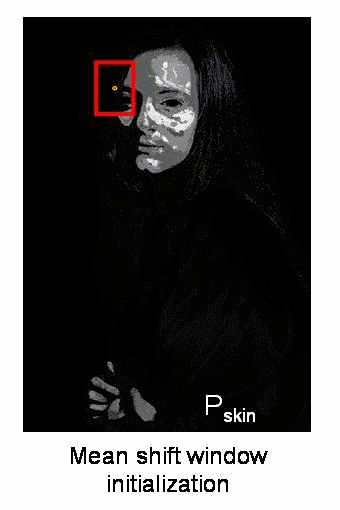

In [31]:
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('images/slow_traffic_small.mp4')
#cap = cv2.VideoCapture('images/moving_subject.mp4')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)

        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

#### Collecting data

The next objective is to recognize which gesture a hand is posed in. We will train our neural network on 4 gestures: fist, five, point and swing. For this network we will train the network on the mask to reduce dimensionality. Doing this makes it a more simple problem for the network to model, while sacrificing information stored in the colours of an image.

Here, we track our hand with the background subtracted and thresholded. Everytime you hit 's' a screen capture of your cropped hand is saved.

In [ ]:
# classes = {
#     0: 'fist',
#     1: 'five',
#     2: 'point',
#     3: 'swing'
# }

# CURR_POSE = 'swing'
# DATA = 'validation_data'

# # Set up tracker.
# def setup_tracker(ttype):
#     tracker_types = ['BOOSTING', 'MIL', 'KCF', 'TLD', 'MEDIANFLOW', 'GOTURN']
#     tracker_type = tracker_types[ttype]

#     if int(minor_ver) < 3:
#         tracker = cv2.Tracker_create(tracker_type)
#     else:
#         if tracker_type == 'BOOSTING':
#             tracker = cv2.TrackerBoosting_create()
#         if tracker_type == 'MIL':
#             tracker = cv2.TrackerMIL_create()
#         if tracker_type == 'KCF':
#             tracker = cv2.TrackerKCF_create()
#         if tracker_type == 'TLD':
#             tracker = cv2.TrackerTLD_create()
#         if tracker_type == 'MEDIANFLOW':
#             tracker = cv2.TrackerMedianFlow_create()
#         if tracker_type == 'GOTURN':
#             tracker = cv2.TrackerGOTURN_create()
    
#     return tracker

# # Helper function for applying a mask to an array
# def mask_array(array, imask):
#     if array.shape[:2] != imask.shape:
#         raise Exception("Shapes of input and imask are incompatible")
#     output = np.zeros_like(array, dtype=np.uint8)
#     for i, row in enumerate(imask):
#         output[i, row] = array[i, row]
#     return output


# # Begin capturing video
# video = cv2.VideoCapture(0)
# if not video.isOpened():
#     print("Could not open video")
#     sys.exit()


# # Read first frame
# ok, frame = video.read()
# if not ok:
#     print("Cannot read video")
#     sys.exit()
# # Use the first frame as an initial background frame
# bg = frame.copy()


# # Kernel for erosion and dilation of masks
# kernel = np.ones((3,3),np.uint8)


# # Tracking
# # Bounding box -> (TopRightX, TopRightY, Width, Height)
# bbox_initial = (60, 60, 170, 170)
# bbox = bbox_initial
# # Tracking status, -1 for not tracking, 0 for unsuccessful tracking, 1 for successful tracking
# tracking = -1


# # Text display positions
# positions = {
#     'hand_pose': (15, 40),
#     'fps': (15, 20)
# }


# # Image count for file name
# img_count = 0

# # Capture, process, display loop    
# while True:
#     # Read a new frame
#     ok, frame = video.read()
#     display = frame.copy()
#     if not ok:
#         break
        
        
#     # Start timer
#     timer = cv2.getTickCount()

    
#     # Processing
#     # First find the absolute difference between the two images
#     diff = cv2.absdiff(bg, frame)
#     mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
#     # Threshold the mask
#     th, thresh = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)
#     # Opening, closing and dilation
#     opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#     closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
#     img_dilation = cv2.dilate(closing, kernel, iterations=2)
#     # Get mask indexes
#     imask = img_dilation > 0
#     # Get foreground from mask
#     foreground = mask_array(frame, imask)
#     foreground_display = foreground.copy()
    
    
#     # If tracking is active, update the tracker
#     if tracking != -1:
#         tracking, bbox = tracker.update(foreground)
#         tracking = int(tracking)
        
        
#     # Use numpy array indexing to crop the foreground frame
#     hand_crop = img_dilation[int(bbox[1]):int(bbox[1]+bbox[3]), int(bbox[0]):int(bbox[0]+bbox[2])]
    
        
#     # Draw bounding box
#     p1 = (int(bbox[0]), int(bbox[1]))
#     p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
#     cv2.rectangle(foreground_display, p1, p2, (255, 0, 0), 2, 1)
#     cv2.rectangle(display, p1, p2, (255, 0, 0), 2, 1)
    
        
#     # Calculate Frames per second (FPS)
#     fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
#     # Display FPS on frame
#     cv2.putText(foreground_display, "FPS : " + str(int(fps)), positions['fps'], cv2.FONT_HERSHEY_SIMPLEX, 0.65, (50, 170, 50), 2)
#     cv2.putText(display, "FPS : " + str(int(fps)), positions['fps'], cv2.FONT_HERSHEY_SIMPLEX, 0.65, (50, 170, 50), 2)
    
    
#     # Display result
#     cv2.imshow("display", display)
#     # Display diff
#     cv2.imshow("diff", diff)
#     # Display thresh
#     cv2.imshow("thresh", thresh)
#     # Display mask
#     cv2.imshow("img_dilation", img_dilation)
#     try:
#         # Display hand_crop
#         cv2.imshow("hand_crop", hand_crop)
#     except:
#         pass
#     # Display foreground_display
#     cv2.imshow("foreground_display", foreground_display)
    
    
#     k = cv2.waitKey(1) & 0xff
    
#     if k == 27: break # ESC pressed
#     elif k == 114 or k == 112: 
#         # r pressed
#         bg = frame.copy()
#         bbox = bbox_initial
#         tracking = -1
#     elif k == 116:
#         # t pressed
#         # Initialize tracker with first frame and bounding box
#         tracker = setup_tracker(2)
#         tracking = tracker.init(frame, bbox)
#     elif k == 115:
#         # s pressed
#         img_count += 1
#         fname = os.path.join(DATA, CURR_POSE, "{}_{}.jpg".format(CURR_POSE, img_count))
#         cv2.imwrite(fname, hand_crop)
#     elif k != 255: print(k)
        
# cv2.destroyAllWindows()
# video.release()

#### Building the Neural Network

Here we assemble the neural network with keras and compile it for training.

This is a very simple convolutional neural network containing three convolutional and max pooling layers. After a tensor is passed through the convolutional layers, it is flatted into a vector and passed through the dense layers.

In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(54, 54, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0821 10:28:11.082856 20368 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 10:28:11.137851 20368 deprecation.py:506] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Preparing Data for Training

Here we use the keras data generator to augment data. This loads data and applies certain transformations to it in order to improve generalization of the model.

The ImageDataGenerator.flow_from_directory() is a convenience method that prepares classification data according to file directories.

Training data is used to train the model to recognize gestures and validation data is used to verify that the model is not over fitting to the training data and the network is converging.

In [33]:
batch_size = 16

training_datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(zoom_range=0.2, rotation_range=10)

training_generator = training_datagen.flow_from_directory(
    'tdata',
    target_size=(54, 54),
    batch_size=batch_size,
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    'vdata',
    target_size=(54, 54),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 0 images belonging to 1 classes.
Found 0 images belonging to 0 classes.


In [34]:
img = load_img('tdata/luther.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in training_datagen.flow(x, batch_size=1,
                          save_to_dir='images/preview', save_prefix='fist', save_format='jpeg'):
    i += 1
    if i > 20:
        break

#### Training the Network

Now we can train the model on the augmented data.

In [35]:
"""
model.fit_generator(
    generator=training_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=50,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=200 // batch_size,
    workers=8,
)
"""

'\nmodel.fit_generator(\n    generator=training_generator,\n    steps_per_epoch=2000 // batch_size,\n    epochs=50,\n    verbose=1,\n    validation_data=validation_generator,\n    validation_steps=200 // batch_size,\n    workers=8,\n)\n'

#### Plotting Model History

Reading in the model fitting output and plotting the results.

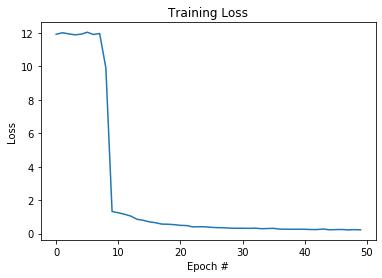

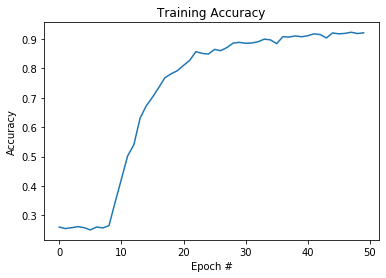

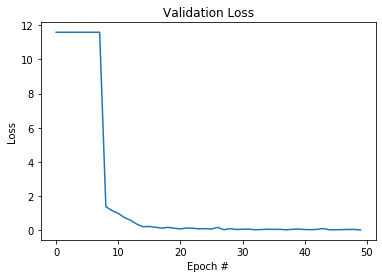

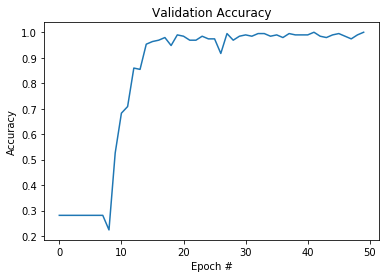

In [36]:
import re
with open(MODEL_HISTORY) as history_file:
    history = history_file.read()

data = {}

data['acc'] = re.findall(' acc: ([0-9]+\.[0-9]+)', history)
data['loss'] = re.findall(' loss: ([0-9]+\.[0-9]+)', history)
data['val_acc'] = re.findall(' val_acc: ([0-9]+\.[0-9]+)', history)
data['val_loss'] = re.findall(' val_loss: ([0-9]+\.[0-9]+)', history)

for key, values in data.items():
    for i, val in enumerate(values):
        values[i] = float(val)

plt.figure()
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.plot(data['loss'])


plt.figure()
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.plot(data['acc'])


plt.figure()
plt.title("Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.plot(data['val_loss'])


plt.figure()
plt.title("Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.plot(data['val_acc'])

In [ ]:
# model.save("hand_model_gray.hdf5")

#### Completed Demo

In [37]:
hand_model = load_model(MODEL_FILE, compile=False)

In [38]:
classes = {
    0: 'fist',
    1: 'five',
    2: 'point',
    3: 'swing'
}

# Set up tracker.
def setup_tracker(ttype):
    tracker_types = ['BOOSTING', 'MIL', 'KCF', 'TLD', 'MEDIANFLOW', 'GOTURN']
    tracker_type = tracker_types[ttype]

    if int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        if tracker_type == 'BOOSTING':
            tracker = cv2.TrackerBoosting_create()
        if tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        if tracker_type == 'KCF':
            tracker = cv2.TrackerKCF_create()
        if tracker_type == 'TLD':
            tracker = cv2.TrackerTLD_create()
        if tracker_type == 'MEDIANFLOW':
            tracker = cv2.TrackerMedianFlow_create()
        if tracker_type == 'GOTURN':
            tracker = cv2.TrackerGOTURN_create()
    
    return tracker

# Helper function for applying a mask to an array
def mask_array(array, imask):
    if array.shape[:2] != imask.shape:
        raise Exception("Shapes of input and imask are incompatible")
    output = np.zeros_like(array, dtype=np.uint8)
    for i, row in enumerate(imask):
        output[i, row] = array[i, row]
    return output


# Begin capturing video
video = cv2.VideoCapture(0)
if not video.isOpened():
    print("Could not open video")
    sys.exit()


# Read first frame
ok, frame = video.read()
if not ok:
    print("Cannot read video")
    sys.exit()
# Use the first frame as an initial background frame
bg = frame.copy()


# Kernel for erosion and dilation of masks
kernel = np.ones((3,3),np.uint8)


# Display positions (pixel coordinates)
positions = {
    'hand_pose': (15, 40), # hand pose text
    'fps': (15, 20), # fps counter
    'null_pos': (200, 200) # used as null point for mouse control
}


# Tracking
# Bounding box -> (TopRightX, TopRightY, Width, Height)
bbox_initial = (116, 116, 170, 170) # Starting position for bounding box
bbox = bbox_initial
# Tracking status, -1 for not tracking, 0 for unsuccessful tracking, 1 for successful tracking
tracking = -1


# Capture, process, display loop    
while True:
    # Read a new frame
    ok, frame = video.read()
    display = frame.copy()
    data_display = np.zeros_like(display, dtype=np.uint8) # Black screen to display data
    if not ok:
        break
        
        
    # Start timer
    timer = cv2.getTickCount()

    
    # Processing
    # First find the absolute difference between the two images
    diff = cv2.absdiff(bg, frame)
    mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    # Threshold the mask
    th, thresh = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)
    # Opening, closing and dilation
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img_dilation = cv2.dilate(closing, kernel, iterations=2)
    # Get mask indexes
    imask = img_dilation > 0
    # Get foreground from mask
    foreground = mask_array(frame, imask)
    foreground_display = foreground.copy()
    
    
    # If tracking is active, update the tracker
    if tracking != -1:
        tracking, bbox = tracker.update(foreground)
        tracking = int(tracking)
        
        
    # Use numpy array indexing to crop the foreground frame
    hand_crop = img_dilation[int(bbox[1]):int(bbox[1]+bbox[3]), int(bbox[0]):int(bbox[0]+bbox[2])]
    try:
        # Resize cropped hand and make prediction on gesture
        hand_crop_resized = np.expand_dims(cv2.resize(hand_crop, (54, 54)), axis=0).reshape((1, 54, 54, 1))
        prediction = hand_model.predict(hand_crop_resized)
        predi = prediction[0].argmax() # Get the index of the greatest confidence
        gesture = classes[predi]
        
        for i, pred in enumerate(prediction[0]):
            # Draw confidence bar for each gesture
            barx = positions['hand_pose'][0]
            bary = 60 + i*60
            bar_height = 20
            bar_length = int(400 * pred) + barx # calculate length of confidence bar
            
            # Make the most confidence prediction green
            if i == predi:
                colour = (0, 255, 0)
            else:
                colour = (0, 0, 255)
            
            cv2.putText(data_display, "{}: {}".format(classes[i], pred), (positions['hand_pose'][0], 30 + i*60), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255), 2)
            cv2.rectangle(data_display, (barx, bary), (bar_length, bary - bar_height), colour, -1, 1)
        
        cv2.putText(display, "hand pose: {}".format(gesture), positions['hand_pose'], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
        cv2.putText(foreground_display, "hand pose: {}".format(gesture), positions['hand_pose'], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
    except Exception as ex:
        cv2.putText(display, "hand pose: error", positions['hand_pose'], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
        cv2.putText(foreground_display, "hand pose: error", positions['hand_pose'], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
    
        
    # Draw bounding box
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(foreground_display, p1, p2, (255, 0, 0), 2, 1)
    cv2.rectangle(display, p1, p2, (255, 0, 0), 2, 1)
    
    
    # Move the mouse
    hand_pos = ((p1[0] + p2[0])//2, (p1[1] + p2[1])//2)
    mouse_change = ((p1[0] + p2[0])//2 - positions['null_pos'][0], positions['null_pos'][0] - (p1[1] + p2[1])//2)
    # Draw mouse points
    cv2.circle(display, positions['null_pos'], 5, (0,0,255), -1)
    cv2.circle(display, hand_pos, 5, (0,255,0), -1)
    cv2.line(display,positions['null_pos'],hand_pos,(255,0,0),5)
    
        
    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    # Display FPS on frame
    cv2.putText(foreground_display, "FPS : " + str(int(fps)), positions['fps'], cv2.FONT_HERSHEY_SIMPLEX, 0.65, (50, 170, 50), 2)
    cv2.putText(display, "FPS : " + str(int(fps)), positions['fps'], cv2.FONT_HERSHEY_SIMPLEX, 0.65, (50, 170, 50), 2)
    
    
    # Display result
    cv2.imshow("display", display)
    # Display result
    cv2.imshow("data", data_display)
    # Display diff
    cv2.imshow("diff", diff)
    # Display thresh
    cv2.imshow("thresh", thresh)
    # Display mask
    cv2.imshow("img_dilation", img_dilation)
    try:
        # Display hand_crop
        cv2.imshow("hand_crop", hand_crop)
    except:
        pass
    # Display foreground_display
    cv2.imshow("foreground_display", foreground_display)
    
    
    k = cv2.waitKey(1) & 0xff
    
    if k == 27: break # ESC pressed
    elif k == 114 or k == 108: 
        # r pressed
        bg = frame.copy()
        bbox = bbox_initial
        tracking = -1
    elif k == 116:
        # t pressed
        # Initialize tracker with first frame and bounding box
        tracker = setup_tracker(2)
        tracking = tracker.init(frame, bbox)
    elif k == 115:
        # s pressed
        fname = os.path.join("data", CURR_POS, "{}_{}.jpg".format(CURR_POS, get_unique_name(os.path.join("data", CURR_POS))))
        cv2.imwrite(fname, hand_crop)
    elif k != 255: print(k)
        
cv2.destroyAllWindows()
video.release()

### AWS Rekognition

## Boto explorer

In [39]:
import boto3
from pprint import pprint

s3 = boto3.resource('s3')
pprint(s3.buckets.all())

# error
# pprint(s3.buckets.all()[0])

print('S3 Buckets')
for bucket in s3.buckets.all():
    pprint(bucket)

ec2 = boto3.resource('ec2')

print('\nEC2 Instances:')
for ins in ec2.instances.all():
    pprint(ins)

print('\nEC2 Instances (id, state)')
for ins in ec2.instances.all():
    print(ins.id, ins.state)
    




s3.bucketsCollection(s3.ServiceResource(), s3.Bucket)
S3 Buckets

EC2 Instances:

EC2 Instances (id, state)


### Celebrity identification

In [40]:
import boto3
from pprint import pprint
import image_helpers

client = boto3.client('rekognition')

# grab the image from online
imgurl = 'http://media.comicbook.com/uploads1/2015/07/fox-comic-con-panel-144933.jpg'

imgbytes = image_helpers.get_image_from_url(imgurl)

rekresp = client.recognize_celebrities(Image={'Bytes': imgbytes})
# pprint(rekresp['CelebrityFaces'])
for face in rekresp['CelebrityFaces']:
    print(face['Name'],'confidence:', face['MatchConfidence'], 'url:',face['Urls'])


Filip Bobek confidence: 87.0 url: ['www.imdb.com/name/nm2168332']
Channing Tatum confidence: 99.0 url: ['www.imdb.com/name/nm1475594']
Brianna Hildebrand confidence: 100.0 url: ['www.imdb.com/name/nm6552202']
Oscar Isaac confidence: 61.0 url: ['www.imdb.com/name/nm1209966']
Mitch McGary confidence: 61.0 url: []


<img src="images/comic.png">

### Face detection graphics

<img src="images/iraq.jpg">

In [41]:
from PIL import Image, ImageDraw
import boto3
from pprint import pprint
from io import BytesIO
import image_helpers

def bbox_to_coords(bbox, img_width, img_height):
    '''Given a BoundingBox map (from Rekognition)
       return the corresponding coords
       suitable for use with ImageDraw rectangle.'''
    upper_left_x = bbox['Left'] * img_width
    upper_y = bbox['Top'] * img_height
    bottom_right_x = upper_left_x + (bbox['Width'] * img_width)
    bottom_y = upper_y + (bbox['Height'] * img_height)
    return [upper_left_x, upper_y, bottom_right_x, bottom_y]

client = boto3.client('rekognition')

imgurl = 'https://www.thenational.ae/image/policy:1.752522:1532159485/IRAQ-PROTEST.jpg'
# imgurl = 'https://blog.njsnet.co/content/images/2017/02/trumprecognition.png'

imgbytes = image_helpers.get_image_from_url(imgurl)


rekresp = client.detect_faces(Image={'Bytes': imgbytes},
                              Attributes=['ALL'])

# load the image in Pillow for processing
img = Image.open(BytesIO(imgbytes))

(img_width, img_height) = img.size

# prepare to draw on the image
draw = ImageDraw.Draw(img)

# pprint(rekresp)
for facedeets in rekresp['FaceDetails']:
    bbox = facedeets['BoundingBox']
    draw.rectangle(bbox_to_coords(bbox, img_width, img_height),
                   outline=(0,200,0))
del draw

img.show()


### Face detection

<img src="images/iraq.jpg">

In [42]:
import boto3
from pprint import pprint
import image_helpers

client = boto3.client('rekognition')

# imgurl = 'http://media.comicbook.com/uploads1/2015/07/fox-comic-con-panel-144933.jpg'
imgurl = 'https://www.thenational.ae/image/policy:1.752522:1532159485/IRAQ-PROTEST.jpg'

imgbytes = image_helpers.get_image_from_url(imgurl)

rekresp = client.detect_faces(Image={'Bytes': imgbytes},
                              Attributes=['ALL'])

# pprint(rekresp)

numfaces = len(rekresp['FaceDetails'])
print('Found', numfaces, end='')
if numfaces == 1:
    print(' face:')
else:
    print(' faces:')

for facedeets in rekresp['FaceDetails']:

    # construct a printf (almost) style format string for printing the info
    fmtstr = '{gender} age {lowage}-{highage},'

    # mustache and beard detection
    if facedeets['Mustache']['Value'] and facedeets['Beard']['Value']:
        fmtstr += ' with beard and mustache,'
    elif facedeets['Mustache']['Value']:
        fmtstr += ' with mustache,'
    elif facedeets['Beard']['Value']:
        fmtstr += ' with beard,'

    # sunglasses/eyeglasses detection
    if facedeets['Sunglasses']['Value']:
        fmtstr += ' wearing sunglasses,'
    elif facedeets['Eyeglasses']['Value']:
        fmtstr += ' wearing glasses,'

    fmtstr += ' looks {emotion}'

    print(
        fmtstr.format(
            gender=facedeets['Gender']['Value'],
            lowage=facedeets['AgeRange']['Low'],
            highage=facedeets['AgeRange']['High'],
            emotion=facedeets['Emotions'][0]['Type'].lower()
        )
    )



Found 16 faces:
Male age 23-37, with beard, looks confused
Male age 23-35, with beard, looks angry
Male age 18-30, looks surprised
Male age 23-37, looks angry
Male age 28-44, looks surprised
Male age 39-57, with beard, looks happy
Male age 22-34, looks happy
Male age 23-35, with beard, looks sad
Male age 16-28, looks sad
Male age 29-45, with beard, looks angry
Male age 17-29, looks happy
Male age 25-39, looks angry
Male age 24-38, looks angry
Female age 13-23, looks calm
Male age 12-22, looks sad
Female age 21-33, looks angry


### Read labels

<img src="images/iraq_protest.jpg">

In [52]:
import boto3
from pprint import pprint
import image_helpers

client = boto3.client('rekognition')

# imgurl = 'https://www.parrots.org/images/uploads/dreamshttp://www.idothat.us/images/idothat-img/features/pool-patio-lanai/ft-pool-patio-lanai-2.jpgtime_C_47716185.jpg'
imgurl = 'https://www.dw.com/image/43774226_403.jpg'

# grab the image from online
imgbytes = image_helpers.get_image_from_url(imgurl)

rekresp = client.detect_labels(Image={'Bytes': imgbytes},
                               MinConfidence=40)
pprint(rekresp['Labels'])


[{'Confidence': 98.20214080810547,
  'Instances': [{'BoundingBox': {'Height': 0.19591771066188812,
                                 'Left': 0.424419641494751,
                                 'Top': 0.7975572943687439,
                                 'Width': 0.09643502533435822},
                 'Confidence': 98.16617584228516},
                {'BoundingBox': {'Height': 0.21369653940200806,
                                 'Left': 0.8701344132423401,
                                 'Top': 0.5393816232681274,
                                 'Width': 0.08382178843021393},
                 'Confidence': 97.88992309570312},
                {'BoundingBox': {'Height': 0.1765432059764862,
                                 'Left': 0.26708680391311646,
                                 'Top': 0.8130976557731628,
                                 'Width': 0.11590459197759628},
                 'Confidence': 96.74658966064453},
                {'BoundingBox': {'Height': 0.2203458547592163,
   

### Track objects in video

![image](images/manifesto.jpg)

In [54]:
#Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#PDX-License-Identifier: MIT-0 (For details, see https://github.com/awsdocs/amazon-rekognition-developer-guide/blob/master/LICENSE-SAMPLECODE.)

import boto3

if __name__ == "__main__":

    bucket='roseaudominica'
    photo='images/manifesto.jpg'

    client=boto3.client('rekognition')

  
    response = client.detect_text(
        Image={
            'S3Object': {
                'Bucket': 'roseaudominica',
                'Name': 'manifesto.jpg'
            }
        }
    )
                        
    textDetections=response['TextDetections']
    print ('Detected text')
    for text in textDetections:
            print ('Detected text:' + text['DetectedText'])
            print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
            print ('Id: {}'.format(text['Id']))
            if 'ParentId' in text:
                print ('Parent Id: {}'.format(text['ParentId']))
            print ('Type:' + text['Type'])
            pprint



Detected text
Detected text:there's wrong and there's right.
Confidence: 99.36%
Id: 0
Type:LINE
Detected text:it's time to take action against the forces of evil.
Confidence: 99.17%
Id: 1
Type:LINE
Detected text:evil says one life is worth less than another.
Confidence: 99.37%
Id: 2
Type:LINE
Detected text:says the flow commerce our purpose here.
Confidence: 97.95%
Id: 3
Type:LINE
Detected text:evil says concentration camps for folks deemed lesser are necessary.
Confidence: 98.66%
Id: 4
Type:LINE
Detected text:the handmaid says concentration camps should be more humane.
Confidence: 98.96%
Id: 5
Type:LINE
Detected text:there's
Confidence: 99.82%
Id: 6
Parent Id: 0
Type:WORD
Detected text:wrong
Confidence: 99.74%
Id: 7
Parent Id: 0
Type:WORD
Detected text:and
Confidence: 99.13%
Id: 8
Parent Id: 0
Type:WORD
Detected text:there's
Confidence: 99.59%
Id: 9
Parent Id: 0
Type:WORD
Detected text:right.
Confidence: 98.53%
Id: 10
Parent Id: 0
Type:WORD
Detected text:it's
Confidence: 98.01%
Id: 11

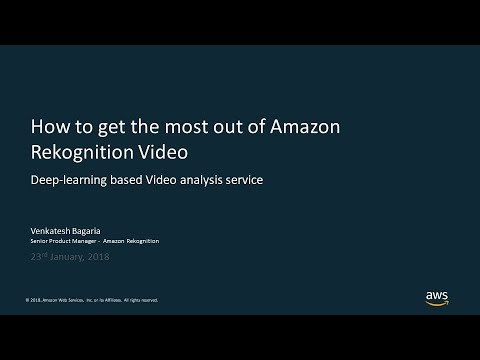

In [55]:
YouTubeVideo('KSFpLhJkrW0')

## Conculsion

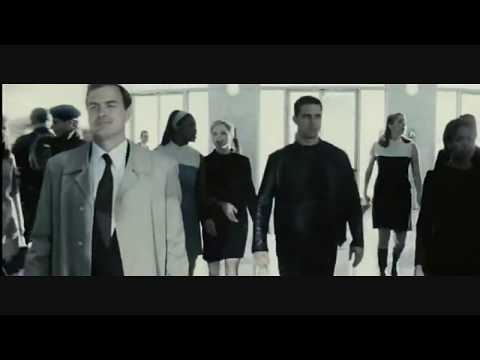

In [56]:
YouTubeVideo('7bXJ_obaiYQ')

What does the future hold for us:
- > Will it be a dystopian future where we are tracked and montitored every moment of our lives? 
- > Will it be a world where our face becomes our identity document? 
- > Will we have a new level of personalization that we never before imagined?

I think our world will look much like it does now:
- > People will wanted to be constantly connected. 
- > They will want increased levels of personalization and ease of use. 
- > There will be people who abuse these technologies and peopple who will use it to bring unknown good to our world.

It is our responsibility as professionals to remain educated and be responsible andethical with these new tools.

**'With great power, comes great responsibility'
Stan Lee**

## Where else can you find me

- JS Louisville: Using Java Script to build AI/ML models
- IndyPy Web Conference: Using API's to diliver AI/ML services
- IndyPy PyData: Using Apache- Airflow to build data workflows
- Oreilly Artificial Intelligence Conference

![images.png](images/sponsor.png)

## usefull jupyter commands

- jupyter nbconver test.ipynb --to slides --post serve
- jupyter nbconvert test.ipynb --to pdf
